In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False


import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

# Selenium

+ https://chromedriver.chromium.org/downloads

+ chrome driver 또는 phantomjs
+ 구글에서 현재 맞는 버전을 사용하면됌

+ pip install selenium

In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome("C:/netsong/download/chromedriver")
driver.get("http://www.naver.com")

<ipython-input-2-5d30b2f112eb>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/netsong/download/chromedriver")


In [41]:
driver.save_screenshot("data/001.png")

True

In [42]:
driver.close()

In [47]:
driver = webdriver.Chrome("C:/netsong/download/chromedriver")
driver.get("https://logins.daum.net/accounts/signinform.do?url=https%3A%2F%2Fwww.daum.net%2F")

In [48]:
elem_login = driver.find_element_by_id("id")
elem_login.clear() #안에입력된내용 지워라
elem_login.send_keys("jhjhjh1919") # 아이디 입력

elem_pwd = driver.find_element_by_id("inputPwd")
elem_pwd.clear() #안에입력된내용 지워라
elem_pwd.send_keys("2934sk1!") # 패스워드 입력

xpath = """//*[@id="loginBtn"]""" # 로그인 버튼
driver.find_element_by_xpath(xpath).click() # 접속 클릭

In [49]:
driver.close()

# 셀프 주유소는 과연 저렴한가?

+ 실제 셀프 주유소가 저렴한지에 대한 팩트 체크
+ 가장 싼 주유소는 어디인가?
+ http://www.opinet.co.kr

### 1. 인천시 주유소 가격 정보 가져오기

#### (1) Sample Code

In [78]:
driver = webdriver.Chrome("C:/netsong/download/chromedriver")
driver.get("https://www.opinet.co.kr/searRgSelect.do")

In [51]:
#### 시, 목록 가져오기


si_list_raw = driver.find_element_by_xpath("""//*[@id="SIDO_NM0"]""") 
si_list = si_list_raw.find_elements_by_tag_name("option")
si_list
si_list[4].get_attribute("value")

si_names = [option.get_attribute("value") for option in si_list]
si_names.remove("")
si_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [52]:
##### 시 선택하기
element = driver.find_element_by_id("SIDO_NM0")
element.send_keys(si_names[3])

In [53]:
##### 구 목록 가져오기

gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""") 
gu_list = gu_list_raw.find_elements_by_tag_name("option")
gu_list
gu_list[3].get_attribute("value")

gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove("")

gu_names


['강화군', '계양구', '남동구', '동구', '미추홀구', '부평구', '서구', '연수구', '옹진군', '중구']

In [54]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[2])

In [55]:
##### 조회 버튼 누르기

driver.find_element_by_xpath("""//*[@id="searRgSelect"]/span""").click()

In [18]:

##### 엑셀 저장 버튼 누르기
# C:\Users\acorn\Downloads

#driver.find_element_by_xpath("""//*[@id="glopopd_excel"]/span""").click()


# (2) 지역별(구 별)로 주유소 정보를 엑셀파일로 저장

In [56]:
from tqdm import tqdm_notebook
import time

In [57]:
for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(1) # 1초쉬기
    
    driver.find_element_by_xpath("""//*[@id="searRgSelect"]/span""").click()
    
    time.sleep(1)
    
    driver.find_element_by_xpath("""//*[@id="glopopd_excel"]/span""").click()
    
    time.sleep(1)
    
driver.close()

  0%|          | 0/10 [00:00<?, ?it/s]

# 2. data Preprocessing 데이터 전처리

In [58]:
### (1) 저장된 엑셀 파일 불러오기

from glob import glob


In [100]:
station_files = glob("data/oil/지역*.xls")
station_files

tmp_raw = []
for fname in station_files:
    tmp = pd.read_excel(fname, header=2)
    tmp_raw.append(tmp)

In [101]:
len(tmp_raw)

25

In [102]:
##### 데이터 프레임으로 합치기

station_raw= pd.concat(tmp_raw)
station_raw.head(30)
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 38
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      486 non-null    object
 1   상호      486 non-null    object
 2   주소      486 non-null    object
 3   상표      486 non-null    object
 4   전화번호    486 non-null    object
 5   셀프여부    486 non-null    object
 6   고급휘발유   486 non-null    object
 7   휘발유     486 non-null    object
 8   경유      486 non-null    object
 9   실내등유    486 non-null    object
dtypes: object(10)
memory usage: 41.8+ KB


In [103]:
stations = pd.DataFrame({"Oil_store":station_raw["상호"],
                        "주소":station_raw["주소"],
                        "가격":station_raw["휘발유"],
                        "셀프":station_raw["셀프여부"],
                        "상표":station_raw["상표"]})

stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603,N,현대오일뱅크
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635,Y,GS칼텍스
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635,Y,현대오일뱅크
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638,N,GS칼텍스


In [104]:
#### 구 컬럼 추출

stations["구"] = [addr.split()[1] for addr in stations["주소"]] # 나눠서 2번째 단어 [1] 스플릿
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635,Y,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638,N,GS칼텍스,강동구


In [105]:
print(stations["구"].unique())
print(len(stations["구"].unique()))

['강동구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구' '영등포구'
 '강북구' '용산구' '은평구' '종로구' '중구' '중랑구' '강서구' '관악구' '광진구' '구로구' '금천구' '노원구'
 '도봉구' '강남구']
25


In [106]:
#### 가격이 없는 주유소 제외

stations["가격"].unique()

stations[stations["가격"]== "-"]

stations = stations[stations["가격"] != "-"]

In [107]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 36
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  474 non-null    object
 1   주소         474 non-null    object
 2   가격         474 non-null    object
 3   셀프         474 non-null    object
 4   상표         474 non-null    object
 5   구          474 non-null    object
dtypes: object(6)
memory usage: 25.9+ KB


In [108]:
###### 가격 정보를 수치로 변환

stations["가격"] = [float(val) for val in stations["가격"]]
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 36
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  474 non-null    object 
 1   주소         474 non-null    object 
 2   가격         474 non-null    float64
 3   셀프         474 non-null    object 
 4   상표         474 non-null    object 
 5   구          474 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.9+ KB


In [109]:
stations.head(30)

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635.0,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635.0,Y,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638.0,N,GS칼텍스,강동구
5,방아다리주유소,서울 강동구 동남로 811 (명일동),1648.0,Y,SK에너지,강동구
6,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1649.0,N,GS칼텍스,강동구
7,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1653.0,N,SK에너지,강동구
8,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1658.0,Y,S-OIL,강동구
9,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1659.0,Y,SK에너지,강동구


In [110]:
# 인덱스를 컬럼으로 되돌린다.

stations.reset_index(inplace=True)

In [111]:
stations

,index,Oil_store,주소,가격,셀프,상표,구
0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549.0,Y,현대오일뱅크,강동구
1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603.0,N,현대오일뱅크,강동구
2,2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635.0,Y,GS칼텍스,강동구
3,3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635.0,Y,현대오일뱅크,강동구
4,4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...,...
469,32,경원주유소,서울 강남구 도산대로 428 (청담동),2056.0,N,S-OIL,강남구
470,33,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,2068.0,N,GS칼텍스,강남구
471,34,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),2069.0,N,GS칼텍스,강남구
472,35,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113.0,N,GS칼텍스,강남구


In [112]:
del stations["index"]

In [113]:
stations

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1549.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1603.0,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635.0,Y,GS칼텍스,강동구
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635.0,Y,현대오일뱅크,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...
469,경원주유소,서울 강남구 도산대로 428 (청담동),2056.0,N,S-OIL,강남구
470,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,2068.0,N,GS칼텍스,강남구
471,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),2069.0,N,GS칼텍스,강남구
472,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113.0,N,GS칼텍스,강남구


# 3.EDA

### (1) 셀프 여부에 따른 가격 차이

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

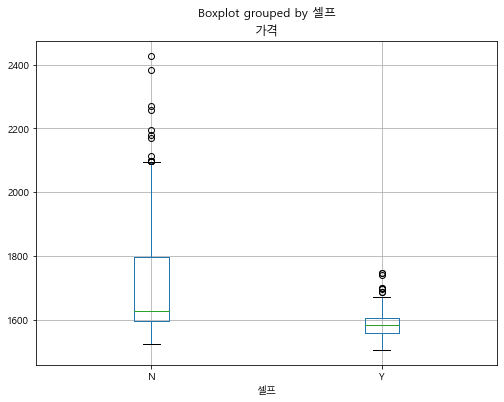

In [114]:
stations.boxplot(by="셀프", column="가격", figsize=(8,6))

### (2) 주유소의 상표별로 얼마나 저렴한가

<AxesSubplot:xlabel='상표', ylabel='가격'>

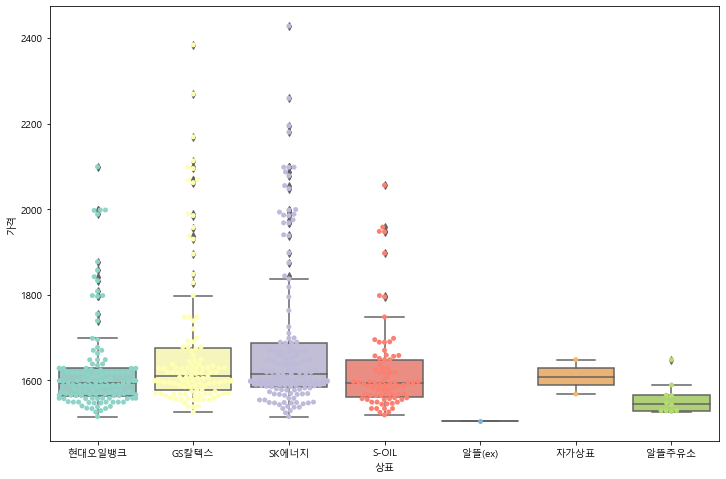

In [115]:
plt.figure(figsize=(12,8))

sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, palette="Set3")

## (3) 구별 주유 가격 확인

In [116]:
#### 인천시에서 가장 가장 주유가격은 비싼곳은 어디인지?(10)


stations.sort_values(by="가격", ascending=False).head(10)
stations.sort_values(by="가격", ascending=True).head(20)

,Oil_store,주소,가격,셀프,상표,구
73,만남의광장주유소,서울 서초구 양재대로12길 73-71,1504.0,Y,알뜰(ex),서초구
207,영등포제일셀프주유소,서울 영등포구 가마산로 379,1515.0,Y,현대오일뱅크,영등포구
208,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1515.0,Y,SK에너지,영등포구
209,성락주유소,서울 영등포구 가마산로 414 (신길동),1519.0,Y,S-OIL,영등포구
181,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1524.0,N,SK에너지,양천구
182,현대주유소,서울 양천구 남부순환로 372 (신월동),1525.0,Y,S-OIL,양천구
234,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1526.0,Y,현대오일뱅크,강북구
235,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1526.0,Y,S-OIL,강북구
236,수유동주유소,서울 강북구 도봉로 395 (수유동),1526.0,Y,GS칼텍스,강북구
125,원천주유소,서울 성북구 돌곶이로 142 (장위동),1527.0,N,알뜰주유소,성북구


In [117]:
#### 구별로 평균값 산출


# stations.groupby(["구"])["가격"].mean()
gu_mean = pd.pivot_table(stations,index=["구"], values=["가격"])
gu_mean.head(11)

,가격
구,
강남구,1791.270270
강동구,1682.437500
강북구,1548.153846
강서구,1598.696970
관악구,1626.687500
광진구,1603.714286
구로구,1606.681818
금천구,1585.666667
노원구,1614.142857


In [118]:
 # 연결시켜주는 함수 choropleth
                                                 # key_on 일치하는것.
map



##### 위의 구별 평균값을 지도로 표시

import folium
import json

map = folium.Map(location=[37.497963, 127.027518], zoom_start=10)

geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map.choropleth(geo_data=geo_str,  data=gu_mean,
              columns=[gu_mean.index, "가격"],
              key_on="feature.id", fill_color="YlGn") # 연결시켜주는 함수 choropleth
                                                      # key_on 일치하는것.
map


# (4) 주유가격 상하위 10씩을 지도의 표시




In [119]:
oil_price_top10 = stations.sort_values(by="가격", ascending=False).head(10)
oil_price_bottom10 = stations.sort_values(by="가격", ascending=True).head(20)

In [128]:
#샘플코드

import requests

header = {"Authorization":"KakaoAK 926afc343583afaf26ce1ae10c6cc5ec"}
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format("서울 중구 통일로 30")

requests.get(url,headers=header).json()


requests.get(url,headers=header).json()["documents"][0]["x"]
requests.get(url,headers=header).json()["documents"][0]["y"]

print(oil_price_top10["주소"])

print("-----------------------------------------")

294                서울 중구 통일로 30
259        서울 용산구 청파로 367 (서계동)
293       서울 중구  퇴계로 196 (필동2가)
292        서울 중구 퇴계로 228 (필동2가)
473              서울 강남구 언주로 716
258     서울 용산구 한강대로104길 6 (동자동)
291               서울 중구 다산로 173
472       서울 강남구 봉은사로 433 (삼성동)
233    서울 영등포구 의사당대로 154 (여의도동)
283         서울 종로구 사직로 65 (사직동)
Name: 주소, dtype: object
-----------------------------------------


In [129]:

#print(oil_price_top10["주소"])

print(oil_price_top10["주소"][259])

print("------------------------------------------")

oil_price_top10["주소"][259].split(" (")[0] # 스플릿으로 (로 두덩이로 나눈다음에 첫번째걸 쓰자

서울 용산구 청파로 367 (서계동)
------------------------------------------


'서울 용산구 청파로 367'

In [130]:
##### 상위 10개에 위도, 경도 추가

lat = []
lng = []

for n in oil_price_top10.index:
    tmp_addr = oil_price_top10["주소"][n].split(" (")[0]
    url = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}".format(tmp_addr)
    
    lat.append(requests.get(url, headers=header).json()["documents"][0]["y"])
    lng.append(requests.get(url, headers=header).json()["documents"][0]["x"])

In [131]:
oil_price_top10["lat"] = lat
oil_price_top10["lng"] = lng

oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
294,서남주유소,서울 중구 통일로 30,2428.0,N,SK에너지,중구,37.5583624710728,126.972067727197
259,서계주유소,서울 용산구 청파로 367 (서계동),2384.0,N,GS칼텍스,용산구,37.552339430427,126.968973680782
293,필동주유소,서울 중구 퇴계로 196 (필동2가),2269.0,N,GS칼텍스,중구,37.560888397210455,126.99367314920487
292,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2259.0,N,SK에너지,중구,37.5617318652342,126.997147791816
473,뉴서울(강남),서울 강남구 언주로 716,2195.0,N,SK에너지,강남구,37.5176495710055,127.035735685446
258,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2180.0,N,SK에너지,용산구,37.550217546860225,126.97247589929034
291,약수주유소,서울 중구 다산로 173,2169.0,N,GS칼텍스,중구,37.558993985065825,127.01272807915872
472,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113.0,N,GS칼텍스,강남구,37.5115223360554,127.047170143424
233,현대오일뱅크㈜직영 여의도현대주유소,서울 영등포구 의사당대로 154 (여의도동),2099.0,N,현대오일뱅크,영등포구,37.517685858482,126.927456255768
283,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2098.0,N,GS칼텍스,종로구,37.5745177164839,126.966623460125


In [134]:
##### 하위 10개에 위도, 경도 추가

lat = []
lng = []

for n in oil_price_bottom10.index:
    tmp_addr = oil_price_bottom10["주소"][n].split(" (")[0]
    url = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}".format(tmp_addr)
    
    lat.append(requests.get(url, headers=header).json()["documents"][0]["y"])
    lng.append(requests.get(url, headers=header).json()["documents"][0]["x"])

In [135]:

oil_price_bottom10["lat"] = lat
oil_price_bottom10["lng"] = lng

oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
73,만남의광장주유소,서울 서초구 양재대로12길 73-71,1504.0,Y,알뜰(ex),서초구,37.4594852424923,127.043140747618
207,영등포제일셀프주유소,서울 영등포구 가마산로 379,1515.0,Y,현대오일뱅크,영등포구,37.5023384820066,126.89960044004
208,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1515.0,Y,SK에너지,영등포구,37.501617839067855,126.89873398922153
209,성락주유소,서울 영등포구 가마산로 414 (신길동),1519.0,Y,S-OIL,영등포구,37.503742240123366,126.90282290508168
181,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1524.0,N,SK에너지,양천구,37.5370183706843,126.834287158433
182,현대주유소,서울 양천구 남부순환로 372 (신월동),1525.0,Y,S-OIL,양천구,37.5339080509165,126.829180082159
234,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1526.0,Y,현대오일뱅크,강북구,37.63159701187975,127.01791548086184
235,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1526.0,Y,S-OIL,강북구,37.64012944951949,127.01719919686428
236,수유동주유소,서울 강북구 도봉로 395 (수유동),1526.0,Y,GS칼텍스,강북구,37.6421578125699,127.029586142017
125,원천주유소,서울 성북구 돌곶이로 142 (장위동),1527.0,N,알뜰주유소,성북구,37.61494535403711,127.05273546987974


In [136]:

map = folium.Map(location=[37.497963, 127.027518], zoom_start=12)

for n in oil_price_top10.index:
    folium.CircleMarker(location=[oil_price_top10["lat"][n], oil_price_top10["lng"][n]],
                                  popup=oil_price_top10["Oil_store"][n],
                                  radius=10, color="#CD3181", fill_color="#CD3181",
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    folium.CircleMarker(location=[oil_price_bottom10["lat"][n], oil_price_bottom10["lng"][n]],
                                  popup=oil_price_bottom10["Oil_store"][n],
                                  radius=10, color="#3186CC", fill_color="#3186CC",
                                  fill=True).add_to(map)
    
map

# *.스크래핑 연습


url = "http://ncov.mohw.go.kr/"

"""
--> 오늘의 신규 확진자 :전일대비 (+ 399)
--> 현재까지 확진자 :(누적)148,273


"""


In [144]:
url = "http://www.naver.com"

"""

오늘의 뉴스

---> 정은경 "백신 오접종 총 105건 발생…90건이 접종대상 오류"
---> G7 회의서 드러난 일본 속내…가입 반대·회담 일방취소
---> 코스피 일주일 만에 최고치 경신… 3,252.13 마감
---> 가해자 조사 뭉갠 공군검찰 수사 압색 후 '잠잠'…봐주기식 우려
---> 전두환 재판 불출석…조영대 신부 "부정해도 죄 가릴 수 없다"
---> 우체국 택배노조 "사회적 합의 어겨"…점거농성 돌입
---> 이준석 "파격이 새로움 넘어 여의도의 새 표준 돼야"
---> 박용진 "파죽지세로 나가겠다…우파 정책도 끌어안아야"
---> 청양 저수지 쇠줄 두른 시신은 50대 지역 주민
---> 머스크 비트코인 결제 중단 번복하자 비트코인 11% 뛰어


"""

'\n\n오늘의 뉴스\n\n---> 정은경 "백신 오접종 총 105건 발생…90건이 접종대상 오류"\n---> G7 회의서 드러난 일본 속내…가입 반대·회담 일방취소\n---> 코스피 일주일 만에 최고치 경신… 3,252.13 마감\n---> 가해자 조사 뭉갠 공군검찰 수사 압색 후 \'잠잠\'…봐주기식 우려\n---> 전두환 재판 불출석…조영대 신부 "부정해도 죄 가릴 수 없다"\n---> 우체국 택배노조 "사회적 합의 어겨"…점거농성 돌입\n---> 이준석 "파격이 새로움 넘어 여의도의 새 표준 돼야"\n---> 박용진 "파죽지세로 나가겠다…우파 정책도 끌어안아야"\n---> 청양 저수지 쇠줄 두른 시신은 50대 지역 주민\n---> 머스크 비트코인 결제 중단 번복하자 비트코인 11% 뛰어\n\n\n'

In [147]:
url = "https://search.naver.com/search.naver?sm=tab_hty.top&whttps://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%9D%8C%EC%9B%90%EC%B0%A8%ED%8A%B8&oquery=%EB%A9%9C%EB%A1%A0%EC%B0%A8%ED%8A%B8&tqi=UrZ0HsprvN8ssK5ZP%2BsssssstVh-314088here=nexearch&query=%EC%9D%8C%EC%9B%90%EC%B0%A8%ED%8A%B8&oquery=%EC%9D%8C%EC%9B%90&tqi=hKk9udp0J14ssfLos3Kssssssl4-396598"




In [4]:
from tqdm import tqdm_notebook
import urllib.request as ureq
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import bs4

def line(str='-', num=50):
    print(str*num)

# 1. 오늘의 날씨
url = "https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query={}"
si_weather = ['서울날씨', '부산날씨', '제주도날씨',
              '광주날씨', '대전날씨', '경기도날씨']

temper = []
word_list = []

for si in tqdm_notebook(si_weather):
    si_encode = urllib.parse.quote_plus(si)
    page = urlopen(url.format(si_encode))
    soup = BeautifulSoup(page, "html.parser")
    
    temper.append(soup.find('div', class_='temperature_text').strong.get_text()[5:])
    word_list.append(soup.find('p', class_='summary').get_text().split())
    
print("오늘의 날씨")
for i in range(len(temper)):
    print("----> " + si_weather[i] + ": " + temper[i] + "C    	 " +
         word_list[i][3] + ", " + word_list[i][0] + " " +
          word_list[i][1] + " " + word_list[i][2])
line()

# 2. 오늘의 국내 코로나 현황 요약
url = "http://ncov.mohw.go.kr/"

page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")

confirmed = soup.find('tbody').tr.get_text().split('\n')[1:-1][-1]
accumulate_confirmed = soup.find('div', 'occur_num').a.previous_sibling

print("오늘의 국내 코로나 현황요약")
print("--> 오늘의 신규 확진자 : 전일대비 (+ " + confirmed + ")")
print("--> 현재까지 확진자 : (누적)" + accumulate_confirmed)
line()

# 3. 오늘의 뉴스
url = "http://www.naver.com"

page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")

news = soup.find('div', class_='list_issue').find_all('div')
news_list = []

for new in range(len(news)):
    news_list.append(news[new].a.get_text())

print("오늘의 뉴스\n")
for news in news_list:
    print("---> " + news)
line()

# 4. 음원차트 순위
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&whttps://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%9D%8C%EC%9B%90%EC%B0%A8%ED%8A%B8&oquery=%EB%A9%9C%EB%A1%A0%EC%B0%A8%ED%8A%B8&tqi=UrZ0HsprvN8ssK5ZP%2BsssssstVh-314088here=nexearch&query=%EC%9D%8C%EC%9B%90%EC%B0%A8%ED%8A%B8&oquery=%EC%9D%8C%EC%9B%90&tqi=hKk9udp0J14ssfLos3Kssssssl4-396598"'

page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

song_names = soup.find_all('span', 'tit_area')
song_name = []
for song in song_names:
    song_name.append(song.get_text())

songs_artist = soup.find_all('span', 'name')[1:20:2]
song_artist = []
for song in songs_artist:
    song_artist.append(song.get_text())

for rank in range(1, 11):
    print(str(rank) + "위 " + song_artist[rank-1] + " -" + song_name[rank-1])

<ipython-input-4-2293b808c955>:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for si in tqdm_notebook(si_weather):


  0%|          | 0/6 [00:00<?, ?it/s]

오늘의 날씨
----> 서울날씨: 7°C    	 맑음, 어제보다 1° 높아요
----> 부산날씨: 13°C    	 맑음, 어제보다 1° 높아요
----> 제주도날씨: 11°C    	 맑음, 어제보다 0° 높아요
----> 광주날씨: 11°C    	 맑음, 어제보다 1° 높아요
----> 대전날씨: 8°C    	 맑음, 어제보다 2° 낮아요
----> 경기도날씨: 7°C    	 맑음, 어제보다 1° 낮아요
--------------------------------------------------
오늘의 국내 코로나 현황요약
--> 오늘의 신규 확진자 : 전일대비 (+ 7,456)
--> 현재까지 확진자 : (누적)583,065
--------------------------------------------------
오늘의 뉴스

---> 삼성 계열사, '특별보너스' 지급한다…"기본급의 최대 200%"
---> 정부 "4차접종, 이스라엘 등서 효과·안전성 정보 축적되면 검토"
---> 5자 대결 윤석열 35.2% vs 이재명 32.9%…동반 하락
---> 김문기 동생 "억울하게 죽은 형, 이 나라 이 정권 다 원망스럽다"
---> “다음 달까지 병상 1만 개 확충”…공공병원 비워 코로나 치료 전담
---> '거리 두기'에 거리 나선 자영업자들..."영업제한 철폐"
---> 김종인 "'이준석 사퇴' 일단락…한 사람 따라 세대가 움직이진 않아"
---> 부스터샷에 또 부스터샷···이스라엘, 세계 첫 '4차 접종' 시작
---> '대장동 실무' 김문기 처장 동생…"형, 잇따른 조사에 정신 상태 혼미"
---> "상여금도 화끈하네"…최대 실적 낸 삼성, 전직원 200% 격려금 쏜다
---> 삼성 직원들은 좋겠네…8년 만에 '특별보너스' 쏜다
---> [단독] 공수처, 野의원 7명 통신 내역도 뒤졌다... 정치권 사찰로 번지나
---> 이재명 "대장동 얘기 정말 미치겠다‥빨리 특검해 전모 밝혀야"
---> [현장] “오락가락…탁상행정” 펜스 뚫고 모인 자영업자

In [2]:



url_s = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8"

html = requests.get(url_s) # 요청하기
html.text # (텍스트 내용)
dir(html) # 어떤변수를 쓸수있는가
seoul = BeautifulSoup(html.text,"html.parser") #데이터를 먹기좋게해주겠다..
print(seoul.find("div","weather_info").get_text())


url_j = "https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=제주도날씨"

html = requests.get(url_j) # 요청하기
html.text # (텍스트 내용)
dir(html) # 어떤변수를 쓸수있는가
jeju = BeautifulSoup(html.text,"html.parser") #데이터를 먹기좋게해주겠다..
print(jeju.find("div","weather_info").get_text())



NameError: name 'requests' is not defined

In [3]:
loc = ["서울","부산","제주도","광주","대전","경기도"]

for i in loc:
    try:
        url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EB%82%A0%EC%94%A8&oquery=%ED%8C%8C%EC%9D%B4%EC%8D%AC+%ED%81%AC%EB%A1%A4%EB%A7%81&tqi=hibXSsprvh8sse4r7vlssssssKl-396473".format(i)
        html = requests.get(url_j) 
        soup = BeautifulSoup(html.text,"html.parser")
        msg = soup.find("div","weather_info").get_text()
    except Except as e:
        print("오류 : ",e)
  
    else:
        print(msg)
        print("________________________________________________")
        
        
        
        


NameError: name 'Except' is not defined

In [21]:
url ="https://www.naver.com/"
soup = BeautifulSoup(html.text,"html.parser")
news = soup.find_all("a","issue")
for i in news[0:10]:
    print("------>", i.get_text())